# Topik Yang Diangkat

seperti yang diketahui saat ini sedang marak berita mengenai ijazah palsu jokowi dodo presiden ke-7 Indonesia. Hal ini banyak diperbincangkan oleh banyak media, dan juga masyarakat umum. Akan tetapi keaslian berita tersebut masih abu-abu dimana hal tersebut dapat mempengaruhi opimini,  ketidak stabilan di masyarakat, dan ketidak stabilan opini publik terhadap politik. 

hal ini mendorong saya untuk mengangkat topik mengenai klasifikasi berita hoax. berita hoax sendiri memiliki pengaruh negatif terhadap masyarakat, karena masih banyak masyarakat indonesia yang masih mempercayai berita hoax begitu saja tanpa memverifikasi kebenaran berita tersebut.

In [81]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import gensim
from nltk.corpus import stopwords
from itertools import chain
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from gensim.models import Word2Vec
from keras.layers import Input
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.utils import class_weight
import matplotlib.pyplot as plt


## Bagian 1: Pengumpulan Data

In [16]:
df = pd.read_csv('Data/training_dataset.csv')
# test_df = pd.read_csv('Data/testing_dataset.csv')

In [17]:
df

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg
...,...,...,...,...,...,...
4226,999287,1,17-Jan-16,: KPK Dilarang Membawa Brimob Bersenjata Masuk...,KPK Dilarang Membawa Brimob Bersenjata Masuk G...,999287.jpg
4227,999472,1,20-Aug-20,Foto pejabat keuangan dibawah palu arit,Jangan mau dialihkan kepada pakaian adat… FOKU...,999472.png
4228,999501,1,17-Aug-20,Gambar Denny Siregar Musuh Warga Tasikmalaya d...,Akhir nya bisa terkenal bang denny,999501.jpg
4229,999848,1,21-Jul-20,Kaesang: Bapak Saya dengan Kesederhaan Bisa Ni...,Bapak Saya dengan Kesederhaan Bisa Nipu Rakyat...,999848.jpg


**1. Penjelasan, sumber, jumlah sampel, dan fitur-fitur pada Dataset**

- penjelasan: Dataset merupakan Indonesia False News(Hoax) Dataset. akan tetapi data berikut tidak menjelaskan sumber berita darimana, dan juga validasi hoax dan tidak hoaxnya darimana

- data sendiri telah dibagi menjadi 2 yaitu data latih dan data uji  dengan total data keseluruhan yaitu 4701. untuk data latih sendiri berjumlah 4321 baris data dengan total 6 kolom, dan data uji 470 baris data dengan total kolom 5. akan tetapi disini saya hanya akan menggunakan dataset train.

- untuk fitur yang ada pada dataset tersebut terdiri dari:
    - ID berita
    - tanggal- merupakan tanggal berita tersebut di publish
    - judul- merupakan judul atau title dari berita
    - narasi- isi dari berita 
    - nama file gambar
    - label - berisi label apakah berita tersebut hoax atau tidak
        - 1 = Hoax
        - 0 = Real


**2. kode yang digunakan untuk pewngumpulan data, dan ringkasan dataset**

- Untuk data sendiri di download melalui platform kaggle dari link berikut : https://www.kaggle.com/datasets/muhammadghazimuharam/indonesiafalsenews/data

- karena data sudah berbentuk csv, dalam melakukan proses import data menggunakan code berikut:
    - "train_df = pd.read_csv('Data/training_dataset.csv')" --> mengimport data dari folder Data dengan nama file "training_dataset". begitupun untuk data testing dengan "nama file training_dataset"



In [18]:
# melakukan pengecekan data null pada dataset
df.isnull().sum()

ID                  0
label               0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64

In [19]:
# test_df.isnull().sum()

**Noted**

berfungsi untuk melihat apakah terdapat data null atau tidak, dimana jika terdapat data null maka baris data tersebut alam dihapus.

## Bagian 2: Pra-pemrosesan data

In [20]:
# menghapus kolom yang tidak diperlukan pada dataset train dan test
df = df.drop(columns=['tanggal', 'nama file gambar', 'ID'])

# test_df = test_df.drop(columns=['tanggal', 'nama file gambar', 'ID'])

In [21]:
df.head()

,label,judul,narasi
0,1,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...
1,1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...
2,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...
3,1,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k..."
4,1,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .


In [22]:
# menggabungkan kolom judul dan narasi
df['judul_narasi'] = df['judul'] + ' ' + df['narasi']
# test_df['judul_narasi'] = test_df['judul'] + ' ' + test_df['narasi']

**Noted**

langakh yang dilakukan pada code sebelumnya yaitu menghapus kolom yang tidak digunakan nantinya. berikutnya terdapat proses penggabungan anatara kolom judul dan narasi diharapkan nantinya dengan menggabungkan kedua kolom tersebut proses klasifikasi menjadi lebih baik, akan tetapi untuk proses kalsifikasi saya akan menggunakan judul terlebih dahulu

In [23]:
df.head()

,label,judul,narasi,judul_narasi
0,1,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,Pemakaian Masker Menyebabkan Penyakit Legionna...
1,1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,Instruksi Gubernur Jateng tentang penilangan ...
2,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,Foto Jim Rohn: Jokowi adalah presiden terbaik ...
3,1,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...","ini bukan politik, tapi kenyataan Pak Jokowi b..."
4,1,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,Foto Kadrun kalo lihat foto ini panas dingin K...


In [24]:
# Pemrosesan slang

# Fungsi untuk memuat kamus slang dari file
def load_slang(slangpath):
    # Inisialisasi dictionary kosong untuk menyimpan pasangan kata slang dan formal
    slang_dict = {}
    
    # Membuka file slang dengan encoding UTF-8
    with open(slangpath, 'r', encoding='Utf-8') as file:
        for line in file:
            # Menghapus whitespace di awal dan akhir baris
            line = line.strip()
            if line:
                # Memisahkan baris berdasarkan tab
                parts = line.split('\t')
                # Mengambil kata slang (selalu ada di posisi pertama)
                slang = parts[0]
                # Mengambil kata formal (jika ada) dari posisi kedua
                formal = parts[1] if len(parts) > 1 else ""
                # Menyimpan pasangan kata ke dalam dictionary
                slang_dict[slang] = formal
    return slang_dict

# Path ke file slang dictionary
slang_file = "Data/slang_indo.txt"
slng_dict = load_slang(slang_file)

In [25]:
# Fungsi untuk memproses kata slang dalam teks menggunakan kamus slang
def process_slang(text, slang_dict = slng_dict):  
    words = text.split()
    processed_words = []

    for word in words:
         # Mengganti jika slang ditemukan, jika tidak biarkan seperti itu
        processed_word = slang_dict.get(word.lower(), word) 
        processed_words.append(processed_word)

    processed_text = ' '.join(processed_words)
    return processed_text

In [26]:
df['slangprep_judul'] = df['judul'].apply(process_slang)
df['slangprep_judulnarasi'] = df['judul_narasi'].apply(process_slang)

**Noted**

pemrosesan slang berfungsi untuk mengubah kata tidak baku menjadi kata baku. contoh "lo" dirubah menjadi "kamu", hal ini berfungsi agar data tidak terlalu bervariasi nantinya

In [27]:
def text_preprocessing(text):

    # proses lowercase 
    def lowercase(text):
        return text.lower()
    
    # menghapus karakter khusus atau simbo yang tidak diinginkan
    def remove_special_chars(text):
        return re.sub(r'[^\w\s-]', ' ', text)
    
    # memsiahkan teks menjadi token
    def tokenize_text(text):
        return re.findall(r'\b[\w-]+\b', text)
    
    # menghapus kata-kata yang tidak memiliki makna (stopwords)
    stopword = set(chain(stopwords.words('indonesian'), stopwords.words('english')))
    def remove_stopwords(tokens):
        return [w for w in tokens if not w in stopword]
    
    # mengubah kata menjad bentuk dasar (stemming)
    stemmer = StemmerFactory().create_stemmer()
    def stem_text(tokens):
        return stemmer.stem(' '.join(tokens)).split()
    
    # melakukan semua tahapan preprocessing
    text_lower = lowercase(text)
    text_clean = remove_special_chars(text_lower)
    tokens = tokenize_text(text_clean)
    tokens_no_stop = remove_stopwords(tokens)
    stemmed_tokens = stem_text(tokens_no_stop)
    
    return {
        'lowercase': text_lower,
        'cleaned': text_clean,
        'tokenized': tokens,
        'no_stopwords': tokens_no_stop,
        'stemmed': stemmed_tokens
    }

In [28]:
# menjalankan fungsi preprocessing pada kolom 'slangprep_judul'
results = df['slangprep_judul'].apply(text_preprocessing)

In [ ]:
# membuat kolom baru pada DataFrame untuk menyimpan hasil preprocessing
df['lowercase'] = results.apply(lambda x: x['lowercase'])
df['cleaned'] = results.apply(lambda x: x['cleaned'])
df['tokenized'] = results.apply(lambda x: x['tokenized'])
df['no_stopwords'] = results.apply(lambda x: x['no_stopwords'])
df['stemmed'] = results.apply(lambda x: x['stemmed'])

**1. Pemrosesan Teks**

- sebelumnya telah melakukan pemrosesan data yaitu slang, dimana mengubah kata tidak baki menjadi kata baku. pada tahap ini tentunya melakukan pemrosean teks dimana teridiri dari lowercase, remove punctuation, tokenize, stopword, dan stemming
    - lowercase yaitu --> mengubah keseluruhan teks menjadi huruf kecil
    - remove punctuation --> pada tahap ini menghapus simbol simbol yang tidak diperlukan
    - tokenize --> mengubah setiap baris teks menjadi bentuk token, contoh "aku kamu" menjadi "['aku', 'kamu']".
    - stopword removal --> pada tahap ini yaitu menghapus setiap kata yang tidak memiliki makna
    - stemming --> ini merupakan proses kahir dalam prep data dimana pada proses ini mengubah setiap kata yang ada menjadi bentuk dasar.

In [31]:
df.head()

,label,judul,narasi,judul_narasi,slangprep_judul,slangprep_judulnarasi,lowercase,cleaned,tokenized,no_stopwords,stemmed
0,1,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,Pemakaian Masker Menyebabkan Penyakit Legionna...,Pemakaian Masker Menyebabkan Penyakit Legionna...,Pemakaian Masker Menyebabkan Penyakit Legionna...,pemakaian masker menyebabkan penyakit legionna...,pemakaian masker menyebabkan penyakit legionna...,"[pemakaian, masker, menyebabkan, penyakit, leg...","[pemakaian, masker, menyebabkan, penyakit, leg...","[pakai, masker, sebab, sakit, legionnaires]"
1,1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,Instruksi Gubernur Jateng tentang penilangan ...,Instruksi Gubernur Jateng tentang penilangan b...,Instruksi Gubernur Jateng tentang penilangan b...,instruksi gubernur jateng tentang penilangan b...,instruksi gubernur jateng tentang penilangan b...,"[instruksi, gubernur, jateng, tentang, penilan...","[instruksi, gubernur, jateng, penilangan, berm...","[instruksi, gubernur, jateng, tilang, masker, ..."
2,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,foto jim rohn: jokowi adalah presiden terbaik ...,foto jim rohn jokowi adalah presiden terbaik ...,"[foto, jim, rohn, jokowi, adalah, presiden, te...","[foto, jim, rohn, jokowi, presiden, terbaik, s...","[foto, jim, rohn, jokowi, presiden, baik, seja..."
3,1,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...","ini bukan politik, tapi kenyataan Pak Jokowi b...","ini bukan politik, tapi kenyataan Pak Jokowi b...","ini bukan politik, tapi kenyataan Pak Jokowi b...","ini bukan politik, tapi kenyataan pak jokowi b...",ini bukan politik tapi kenyataan pak jokowi b...,"[ini, bukan, politik, tapi, kenyataan, pak, jo...","[politik, kenyataan, jokowi, berhasil, memulan...","[politik, nyata, jokowi, hasil, pulang, 11, 00..."
4,1,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,Foto Kadrun kalo lihat foto ini panas dingin K...,Foto Kadrun kalau lihat foto ini panas dingin,Foto Kadrun kalau lihat foto ini panas dingin ...,foto kadrun kalau lihat foto ini panas dingin,foto kadrun kalau lihat foto ini panas dingin,"[foto, kadrun, kalau, lihat, foto, ini, panas,...","[foto, kadrun, lihat, foto, panas, dingin]","[foto, kadrun, lihat, foto, panas, dingin]"


**2. Menampilkan data sebelum dan sesudah dilakukan proses preprocessing**

setelah melakukan proses prep maka kita dapat menbampilkan data dalam bentuk dataframe. hal ini berfungsi untuk melihat perbedaan data sebelum dan seduah dilakukan proses preprocessing.

## Bagian 3: Rekyasa Fitur

### TF-IDF

In [32]:
# Ekstraksi fitur dari teks yang sudah diproses dengan TF-IDF
df['prep_data_tfidf'] = df['stemmed'].apply(lambda x: ' '.join(x))

# melakukan proses splitting data menjadi training dan testing
X_train_tftidf, X_test_tftidf, y_train_tftidf, y_test_tftidf = train_test_split(
    df['prep_data_tfidf'], df['label'], test_size=0.2, random_state=42
)

In [33]:
# Vectorisasi TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_tftidf)
X_test_tfidf = vectorizer.transform(X_test_tftidf)

In [34]:
# Ambil fitur kata (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Ubah sparse matrix menjadi array dan buat DataFrame
df_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)



In [35]:
# Tampilkan beberapa baris
df_tfidf.head()

,00,000,01,02,04,10,100,1000,1000k,100gb,...,zon,zona,zone,zubair,zuckerberg,zuhur,zulkarnaen,zulkarnain,zulkifli,zulkifliemansyah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**1. Pnejelasan dan Representasi TF-IDF**

- TF-IDF merupakan metode untuk mengubah teks menjadi vector untuk menunjukkan sebarapa pentin suatu kata dalam sebuah dokumen dibanfingkan dengan seluruh dokumen di korpus. Tewrdiri dari 2 konsep yitu: 
    - TF --> seberapa sering suatu kata muncul dalam dokumen, semakin sering muncul maka semakin tinggi nilainya
    - IDF--> mengukur sebarapa jarang kata muncul dalam dokumen, semakin jarang maka kata tersebut semakin tidak bernilai.
    - Gabungan TF dan IDF memberikan bobot yang tinggi untuk kata-kata yang sering muncul di satu dokumen, tetapi jarang muncul di dokumen lain, sehingga dianggap lebih merepresentasikan isi dokumen tersebut.
- representasi: sail vektor numerik untuk setiap dokumen dimana setiap nilai menunjukkan kepentingan dari sebuah kata. Representasi ini bersifata sparse, artinya banyak nilai nol larena tidak setiap kata muncul di semua dokumen. 
    - Conroh: Jika ada tiga dokumen:

    - D1: "kucing makan ikan"

      D2: "ikan segar enak"

      D3: "kucing suka tidur"

      Maka TF-IDF akan memberi bobot tinggi pada kata-kata seperti "tidur" atau "segar" karena mereka muncul di sedikit dokumen, dan bobot lebih rendah untuk kata seperti "ikan" yang muncul di banyak dokumen.

### Word2vec

In [36]:
sentences = df['stemmed']

# Latih Word2Vec
model_w2v = Word2Vec(
    sentences,
    vector_size=100,    
    window=5,
    min_count=1,
    sg=1,                
    workers=4,
    epochs=10
)

vector_size = model_w2v.vector_size

In [37]:
# Ambil semua kata dan vektornya
vocab = list(model_w2v.wv.index_to_key)
word_vectors = [model_w2v.wv[word] for word in vocab]

# Buat DataFrame
df_word2vec = pd.DataFrame(word_vectors, index=vocab)
df_word2vec.columns = [f'word_{i}' for i in range(vector_size)]

In [38]:
df_word2vec.head()

,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,...,word_90,word_91,word_92,word_93,word_94,word_95,word_96,word_97,word_98,word_99
foto,-0.129275,0.234116,0.082847,0.071006,0.087291,-0.433181,0.045394,0.523332,-0.181636,-0.120214,...,0.208169,0.081562,0.106212,0.013052,0.359083,0.215250,0.165235,-0.268741,0.012161,0.034648
video,-0.132989,0.214100,0.057540,0.037535,0.052334,-0.416112,0.087714,0.510180,-0.183231,-0.132417,...,0.223886,0.091957,0.107067,0.038140,0.368579,0.202373,0.218521,-0.263356,0.009935,0.005457
jokowi,-0.169615,0.245110,0.105300,0.080357,0.157990,-0.389827,-0.023578,0.524550,-0.195734,-0.087369,...,0.187854,0.077394,0.159926,-0.039918,0.377692,0.256204,0.151983,-0.272029,0.027166,0.034866
indonesia,-0.151399,0.234810,0.051072,0.003887,0.079429,-0.462311,0.048496,0.584162,-0.163383,-0.145705,...,0.182473,0.067497,0.099414,0.060681,0.394068,0.233091,0.190874,-0.314228,0.024105,-0.041621
corona,-0.325431,0.115669,-0.171351,-0.267428,-0.138102,-0.255620,0.349806,0.779695,-0.253579,-0.121862,...,0.359614,0.129357,0.121530,0.029242,0.546587,0.128257,0.520604,-0.295971,0.186140,-0.050542


In [39]:
# Panjang maksimal dokumen
max_len = 100  

def get_word2vec_sequence(tokens, model, vector_size, max_len):
    sequence = []
    for word in tokens:
        if word in model.wv:
            sequence.append(model.wv[word])
    if len(sequence) < max_len:
        padding = [np.zeros(vector_size)] * (max_len - len(sequence))
        sequence.extend(padding)
    else:
        sequence = sequence[:max_len]
    return np.array(sequence)

In [40]:
# Buat array 3D (jumlah dokumen, panjang kalimat, dimensi vektor)
X = np.array([
    get_word2vec_sequence(tokens, model_w2v, vector_size, max_len)
    for tokens in df['no_stopwords']
])

# Ubah label ke bentuk numerik
le = LabelEncoder()
y = le.fit_transform(df['label'])

**2. Penjelasan Word2vec dan representasinya**

- word2vec merupakan sebuah teknik embedding kata diaman mengubah setiap kata yang ada menjadi sebuah vector numerik denganberdimensi rendah dan dapat di proses oleh machine learning. Tujuannya yaiu untuk menangkap makna dalam sebuah kata berdasarkan konteks yang ada dalam sebuah kalimat atau copus. terdapat 2 arsitektur dalam word2vec:
    - CBOW --> melakukan proses prediksi dari kata kata konteks yang muncul. Misalnya kita ingin mprediksi tengah berdasarkan kata kata skitarnya
    - skip gram --> memprediksi kata kata konteks berdaskan kata kata target, hal ini merupakan kebalikan dari CBOW.

- Representasi --> setiap kata yang ada direprsentasikan sebagai vektor dimensi tetap (biasanya 100-300), vector ini dihasilkan dari pelatihan neural network sederhana untuk mempelajari kata berdasarkan hubungan frekuensi kemunculan bersama, hal tersebut menghasilkan representasi yang memetakan kata kata dengan makna serupa ke posisi yang dekat dalam ruang vector. contohnya word2vec menangkap hubungan semantik "v("king") - v("man") + v("woman") ≈ v("queen")"

## Bagian 4: Analisis Data, Ekloprasi, dan Visualisasi

In [41]:
#  Menggabungkan semua kata yang telah di-stem untuk membuat word cloud
all_words = df['stemmed'].explode().dropna().astype(str)
text = ' '.join(all_words)

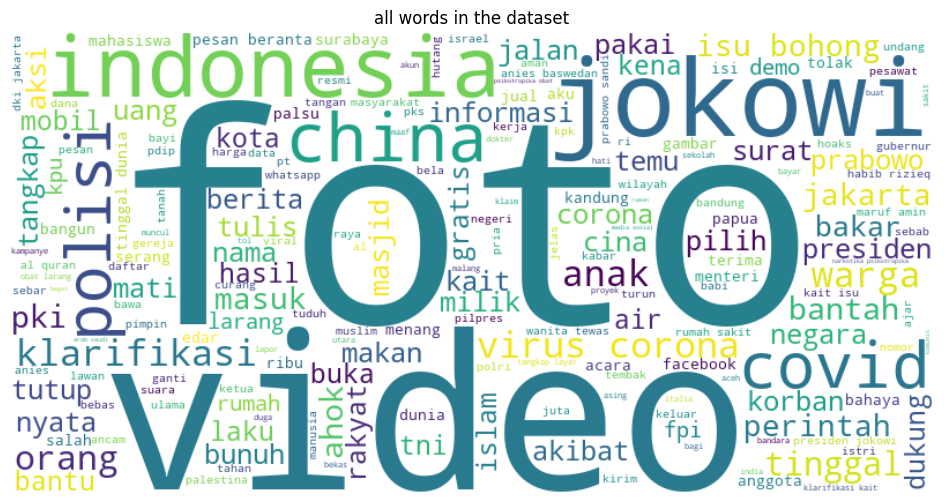

In [42]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('all words in the dataset')
plt.show()

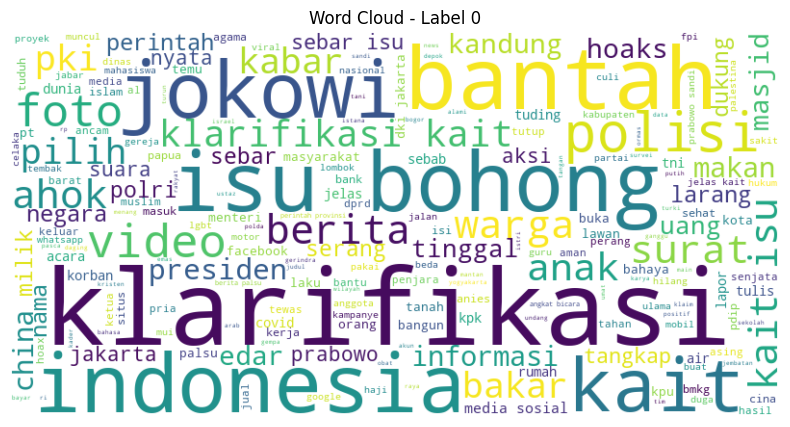

In [43]:
label_0_words = [word for tokens in df[df['label'] == 0]['stemmed'] for word in tokens]
text_label_0 = ' '.join(label_0_words)

# Membuat visualisasi WordCloud untuk label 0 (berita asli/tidak hoax)
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(text_label_0)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Label 0')
plt.show()

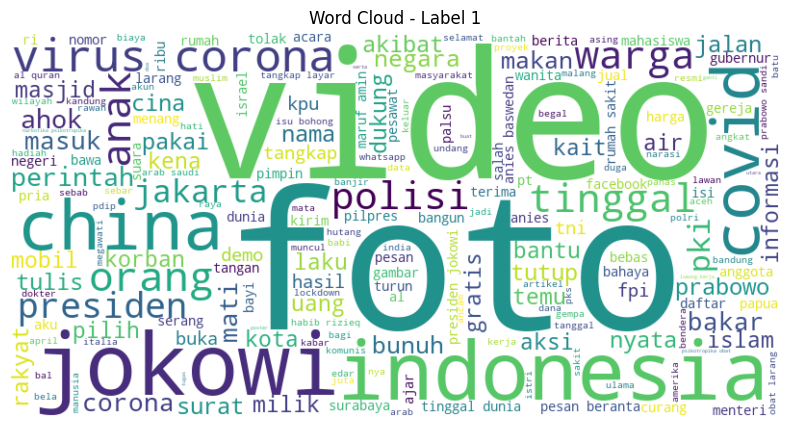

In [44]:
label_1_words = [word for tokens in df[df['label'] == 1]['stemmed'] for word in tokens]
text_label_1 = ' '.join(label_1_words)

# Membuat visualisasi wordcloud untuk label 1 (berita hoax)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_label_1)

# Membuat plot untuk visualisasi
plt.figure(figsize=(10, 5))  # Mengatur ukuran gambar
plt.imshow(wordcloud_1, interpolation='bilinear')  # Menampilkan wordcloud
plt.axis('off') 
plt.title('Word Cloud - Label 1')  
plt.show()  

**Wordcloud**

proses sebelumnya  yaitu membuat visualisasi dengan wordcloud di mana hal tersebut berfungsi untuk melihat seberapa sering sebuah kata muncul dalam keseluruhan dokumen, atau seberapa sering suatu kata muncul dalam sebuah label. Semakin besar ukuran kata maka kata tersebut sering muncul dalam dokumen tersebut

contohnya pada label 1--> kata yang sering muncul adalah Foto, dan Foto. sedangkan pada label 0 terlihat bahwa cukup banyak kata yang terdistribusi merata, dapat dilihat dari ukuran pada setiap kata yang ada

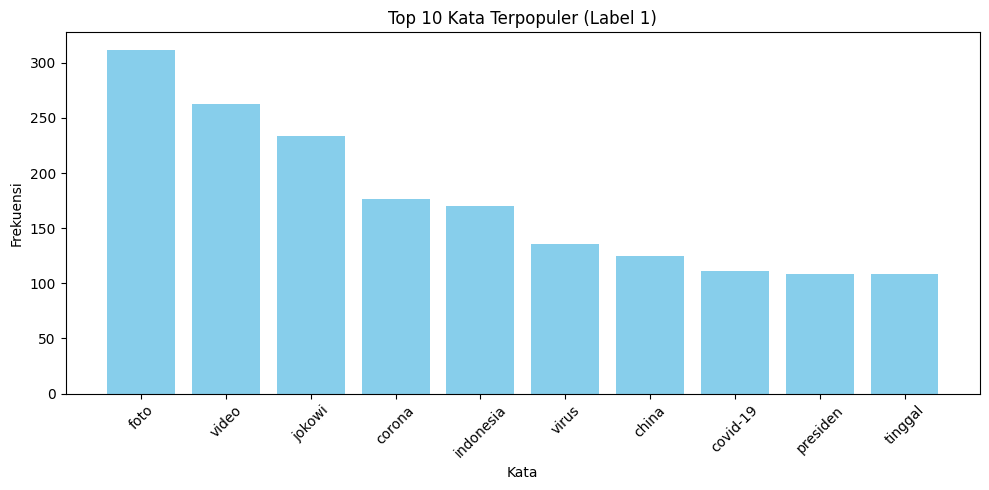

In [45]:
word_freq = Counter(label_1_words)
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Kata Terpopuler (Label 1)')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


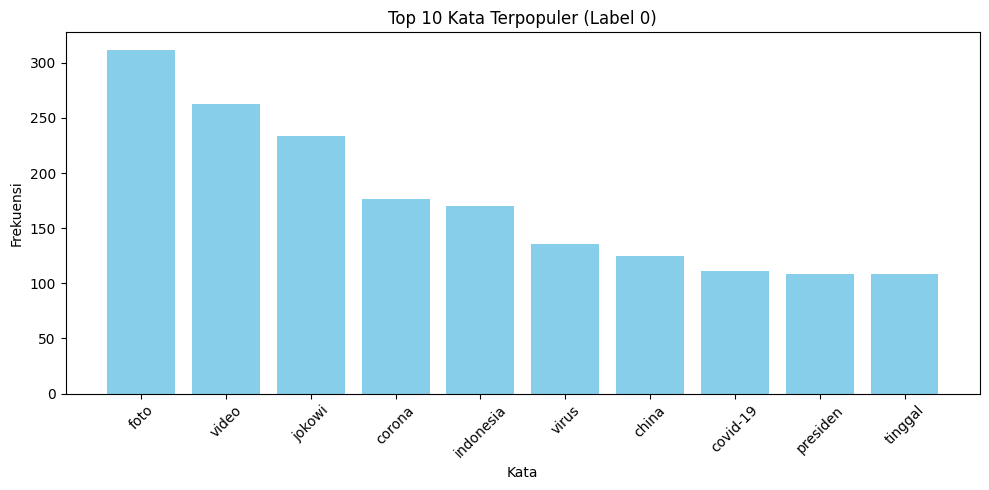

In [46]:
word_freq1 = Counter(label_0_words)
top_words1 = word_freq.most_common(10)
words1, counts1 = zip(*top_words1)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Kata Terpopuler (Label 0)')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Plot Frekuensi KataTeratas**

seperti namanya visualisasi ini bertujuan untuk melihat 10 kata teratas pada dokumen, disini saya memisahkan antara label 0 dan label 1 agar dapat melihat lebih jelas kata apa saja yang sering muncul pada setiap label.

misalnya pada label 0, untuk 10 kata paling sering keluar adalah klarifikasi, isu, kait, bantah, bohong, Indonesia, jokowi, polisi, sebar, dan video. sedangkan terdapat 3 kata tertinggi paling muncul dengan frekuansi 100 - 80 diantaranya klasifikasi, isu, dan kait hal ini menandakan banyak judul berita yang membahas topik misalnya tentang klarifikasi.

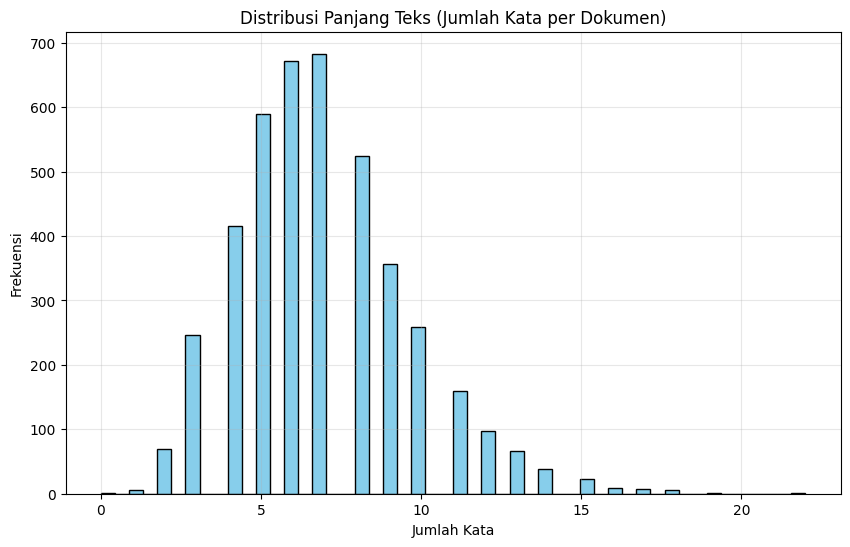

Rata-rata jumlah kata: 6.95
Median jumlah kata: 7.00
Minimum jumlah kata: 0
Maximum jumlah kata: 22


In [47]:
# Menghitung panjang teks untuk setiap dokumen
text_lengths = df['stemmed'].apply(len)

# Membuat histogram untuk visualisasi distribusi panjang teks
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribusi Panjang Teks (Jumlah Kata per Dokumen)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)
plt.show()

# Menampilkan statistik dasar tentang panjang teks
print(f"Rata-rata jumlah kata: {text_lengths.mean():.2f}")
print(f"Median jumlah kata: {text_lengths.median():.2f}")
print(f"Minimum jumlah kata: {text_lengths.min()}")
print(f"Maximum jumlah kata: {text_lengths.max()}")

**Plot distribusi panjang teks**

- Pola Distribusi
    - Distribusi terlihat miring ke kanan (right-skewed), artinya sebagian besar teks relatif pendek.
    - Sebagian besar dokumen memiliki panjang teks antara 5 hingga 8 kata.
    - Titik puncak (modus) distribusi berada di sekitar 6–7 kata per dokumen.

-  Rentang Panjang Teks
    - Teks terpendek terdiri dari 0 hingga 1 kata (kemungkinan hasil dari preprocessing kosong atau gagal tokenisasi).
    - Teks terpanjang mencapai sekitar 21–22 kata, tetapi jumlahnya sangat sedikit.

-  Frekuensi
    - Lebih dari 600 dokumen memiliki 6 atau 7 kata — ini menunjukkan kecenderungan data yang sangat ringkas.
    - Frekuensi menurun drastis setelah 10 kata, menunjukkan bahwa teks panjang jarang ditemukan.

## Bagian 5: Klasifikasi Teks (pelatihan Model)

In [89]:
# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [90]:
# membangun dan meanjalankan model LSTM

model = Sequential()
model.add(Input(shape=(max_len, vector_size)))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64))  
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))


In [93]:
# Kompilasi model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Tampilkan struktur model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 100, 128)       │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,946 (667.76 KB)

 Trainable params: 170,946 (667.76 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# Latih model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=100,
    validation_data=(X_test, y_test)
)

Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.8182 - loss: 0.4746 - val_accuracy: 0.8359 - val_loss: 0.4503
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 220ms/step - accuracy: 0.8126 - loss: 0.4835 - val_accuracy: 0.8359 - val_loss: 0.4495
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - accuracy: 0.8160 - loss: 0.4779 - val_accuracy: 0.8359 - val_loss: 0.4491
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.8217 - loss: 0.4700 - val_accuracy: 0.8359 - val_loss: 0.4501
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 417ms/step - accuracy: 0.8199 - loss: 0.4722 - val_accuracy: 0.8359 - val_loss: 0.4494
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 306ms/step - accuracy: 0.8233 - loss: 0.4677 - val_accuracy: 0.8359 - val_loss: 0.4507
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.8135 - loss: 0.4805 - val_accuracy: 0.8359 - val_loss: 0.4496
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 438ms/step - accuracy: 0.8140 - loss: 0.4811 - val_accuracy:

In [98]:
# Gunakan model untuk memprediksi data uji
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Ambil kelas prediksi

# Tampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Tampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       139
           1     0.8359    1.0000    0.9106       708

    accuracy                         0.8359       847
   macro avg     0.4179    0.5000    0.4553       847
weighted avg     0.6987    0.8359    0.7612       847



c:\Users\Acer-Nitro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer-Nitro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer-Nitro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

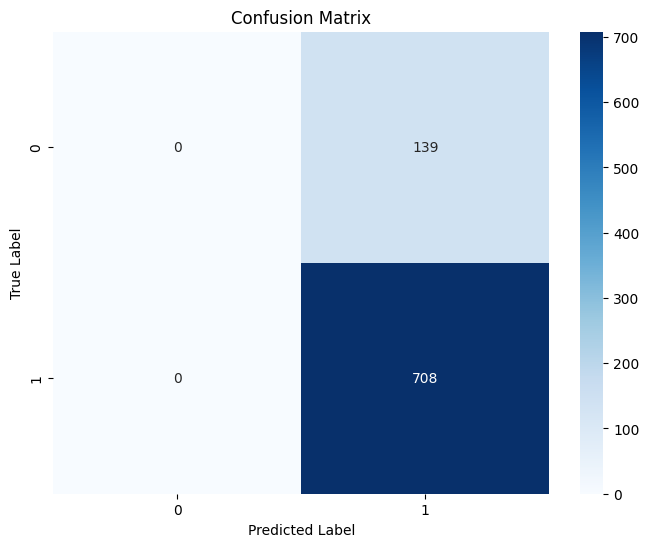

In [99]:
# Tampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Bagian 6: Teori

1. perbedaan klastering dan klasifikasi adalah:
    - clustering bertujuan untuk mengelompokkan data dalam kelompok yang serupa berdasarkan dari kesamaan karakteristik tertentu untuk menemukan pola yang terdapat dalam data tanpa adanya label kelas sebelumnya
    - klasifikasi sendiri bertujuan untuk melakukan proses klasifikasi data ke dalam kelas yang sudah ditentukan dan dapat membangun model yang dapat melakukan proses prediksi kelas untuk data baru berdasarkan pembelajaran dari data yang sudah dilakukan proses klasifikasi seblumnya saat melatih model
    - referensi (https://repository.its.ac.id/64455/1/06211745000032-Undergraduate_Theses.pdf)-dengan judul artikel Data Mining yang terdapat pada halaman 110 pada sub judul "C" dan terdapat pada BAB 7

2. apan kalstering teks dapat digunakan, situasi dan kondisinya bagaimana, beserta contohnya
    - klastering dapat digunakan pada teks saat ketika kondisi kita ingin  mengelompokkan kumpulan teks berdasarkan kesamaan isi atau makna tanpa perlu adanya label dan kategori yang telah ditentukan sebelumnya.
    - cocok digunakan saat situasi dan konidisi ketika terdapat kumpulan data yang berukuran besar dan kita ingin menemukan pola struktur yang tersembunyi
    -contoh misalnya pada bidang e-commerce kita disini menggunakan analisis clustering untuk segmentasi pasar, yaitu melakukan pengolompokan terhadap konsumen berdasarkan preferensi, perilaku pembelian, dan demografi yang ada.
    - referensi (https://repository.its.ac.id/64455/1/06211745000032-Undergraduate_Theses.pdf)-dengan judul artikel Data Mining yang terdapat pada halaman 109-110 pada sub judul "A dan B" dan terdapat pada BAB 7

3. untuk menentukan jumlah cluster yang optimal ada beberapa metode yang dapat digunakan, saya akan menjelaskan 2 dari metode yang ada:
    - metode ellbow
        - pada metode ini nilai cluster ditentukan dengan menggunakn grafik dari nilai SSE dari masing nilai claster yang ada. dari grafik kita dapat memiliih nilai cluster pertama dengan nilai cluster kedua membentuk sudut dalam grafik.
    - Metode Davies Bouldin Index 
        - untuk menentukan nilai cluster yangbaik kita dapat menentukan dari nilai Metode Davies Bouldin Index yang paling rendah dibandingkan dengan yang liannya
    - referensi (https://repository.its.ac.id/64455/1/06211745000032-Undergraduate_Theses.pdf)-dengan judul artikel Data Mining yang terdapat pada halaman 114-115 pada sub judul "F" dan terdapat pada BAB 7
